In [1]:
import numpy as np

In [2]:
batch, input_data, hidden, output_data = 64, 1000, 100, 10

In [3]:
x = np.random.randn(batch, input_data)
y = np.random.randn(batch, output_data)

In [4]:
w1 = np.random.randn(input_data, hidden)
w2 = np.random.randn(hidden, output_data)

In [5]:
print(x.shape, y.shape, w1.shape, w2.shape)

(64, 1000) (64, 10) (1000, 100) (100, 10)


In [6]:
learning_rate = 1e-6

In [7]:
all_losses = []

for i in range(500):
    # forward
    inh1 = x.dot(w1)
    outh1 = np.maximum(inh1, 0) # relu activation
    prediction = outh1.dot(w2) # in_h2
    
    # loss
    loss = np.square(prediction - y).sum()
    all_losses.append(loss)
#     print('i = %d, loss = %d' % (i, loss))
    
    # backward
    grad_loss_prediction = 2.0 * (prediction - y)
    grad_prediction_w2 = outh1
    grad_loss_w2 = grad_prediction_w2.T.dot(grad_loss_prediction) 
#     grad_loss_prediction * grad_prediction_w2 = grad_loss_w2
#     you can simplify grad_loss_w2 as 
#     grad_loss_w2 = outh1.T.dot(grad_loss_prediction)
    grad_prediction_outh1 = w2
    grad_loss_outh1 = grad_loss_prediction.dot(grad_prediction_outh1.T) 
#     grad_loss_prediction * grad_prediction_outh1 = grad_loss_outh1
#     you can simplift grad_loss_outh1 as
#     grad_loss_outh1 = grad_loss_prediction.dot(w2.T) 
    grad_loss_inh1 = grad_loss_outh1.copy()
    grad_loss_inh1[inh1<0] = 0
    grad_inh1_w1 = x
    grad_loss_w1 = grad_inh1_w1.T.dot(grad_loss_inh1) 
#     grad_loss_prediction * grad_prediction_outh1 * grad_outh1_inh1 * grad_inh1_w1 = grad_loss_w1
#     you can simplify grad_loss_w1 as
#     grad_loss_w1 = x.T.dot(grad_loss_inh1) 

    # weight update
    w1 -= learning_rate * grad_loss_w1
    w2 -= learning_rate * grad_loss_w2

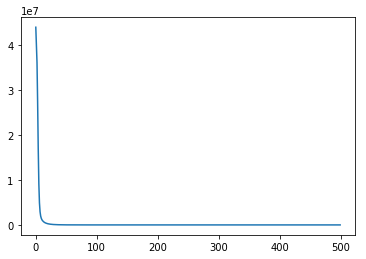

In [8]:
import matplotlib.pyplot as plt
% matplotlib inline

plt.figure()
plt.plot(all_losses)